In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Data Description The Habermans survival dataset contains cases from a study that was conducted 
between 1958 and 1970 at the University of 
Chicagos Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

In [2]:
df = pd.read_csv('haberman.csv')

In [3]:
df.shape

(305, 4)

In [4]:
df.sample(5)

,30,64,1,1.1
80,45,66,0,2
198,57,64,1,2
0,30,62,3,1
11,34,67,7,1
133,50,65,4,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   30      305 non-null    int64
 1   64      305 non-null    int64
 2   1       305 non-null    int64
 3   1.1     305 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [6]:
df.isnull().sum()

30     0
64     0
1      0
1.1    0
dtype: int64

In [7]:
df.describe()

,30,64,1,1.1
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [8]:
df.corr()

,30,64,1,1.1
30,1.000000,0.092623,-0.066548,0.064351
64,0.092623,1.000000,-0.003277,-0.004076
1,-0.066548,-0.003277,1.000000,0.286191
1.1,0.064351,-0.004076,0.286191,1.000000


# CLEANING DATA

1. Col names are not properly written
2. The year_of_treatment col varies from 1958-1970 in which 19 is missing. 
3. The survival_status_after_5_years col should be in category format

In [9]:
df.columns = ['age', 'year_of_treatment', 'positive_lymph_nodes', 'survival_status_after_5_years']
df.head(2)

,age,year_of_treatment,positive_lymph_nodes,survival_status_after_5_years
0,30,62,3,1
1,30,65,0,1


In [10]:
df['year_of_treatment'] = '19' + df['year_of_treatment'].astype(str)
    
df['year_of_treatment'] = df['year_of_treatment'].astype(int)    
    
df['year_of_treatment']      

0      1962
1      1965
2      1959
3      1965
4      1958
       ... 
300    1962
301    1967
302    1965
303    1965
304    1958
Name: year_of_treatment, Length: 305, dtype: int32

In [11]:
df['survival_status_after_5_years']  = df['survival_status_after_5_years'].map({1:"yes", 2:"no"})
df['survival_status_after_5_years'] = df['survival_status_after_5_years'].astype('category')
df['survival_status_after_5_years'].astype

<bound method NDFrame.astype of 0      yes
1      yes
2      yes
3      yes
4      yes
      ... 
300    yes
301    yes
302    yes
303     no
304     no
Name: survival_status_after_5_years, Length: 305, dtype: category
Categories (2, object): ['no', 'yes']>

# Observation after seeing data

1. The data consists of 305 rows and 4 columns.
2. The mean age is 52.
3. The min age is 30 and the max age is 83.

In [12]:
df.head(5)

,age,year_of_treatment,positive_lymph_nodes,survival_status_after_5_years
0,30,1962,3,yes
1,30,1965,0,yes
2,31,1959,2,yes
3,31,1965,4,yes
4,33,1958,10,yes


# UNIVARIATE ANALYSIS

1. survival_status_after_5_years

In [13]:
df['survival_status_after_5_years'].value_counts()

yes    224
no      81
Name: survival_status_after_5_years, dtype: int64

In [14]:
status_yes=df.loc[df["survival_status_after_5_years"]=="yes"]
status_no=df.loc[df["survival_status_after_5_years"]=="no"]

print("SURVIVAL STATUS : YES -> STATISTICS :")
print(status_yes.describe())
print("\n****************************************************************************\n")
print("SURVIVAL STATUS : NO -> STATISTICS :")
print(status_no.describe())

SURVIVAL STATUS : YES -> STATISTICS :
              age  year_of_treatment  positive_lymph_nodes
count  224.000000         224.000000            224.000000
mean    52.116071        1962.857143              2.799107
std     10.937446           3.229231              5.882237
min     30.000000        1958.000000              0.000000
25%     43.000000        1960.000000              0.000000
50%     52.000000        1963.000000              0.000000
75%     60.000000        1966.000000              3.000000
max     77.000000        1969.000000             46.000000

****************************************************************************

SURVIVAL STATUS : NO -> STATISTICS :
             age  year_of_treatment  positive_lymph_nodes
count  81.000000          81.000000             81.000000
mean   53.679012        1962.827160              7.456790
std    10.167137           3.342118              9.185654
min    34.000000        1958.000000              0.000000
25%    46.000000        1

C:\Users\Hunani Trading Co\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='survival_status_after_5_years', ylabel='count'>

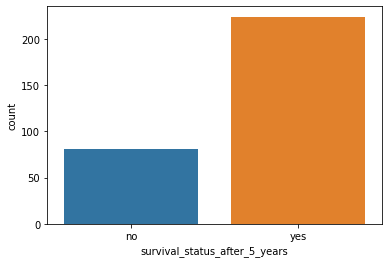

In [15]:
sns.countplot(df['survival_status_after_5_years'])

C:\Users\Hunani Trading Co\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Hunani Trading Co\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Hunani Trading Co\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Hunani Trading Co\anaconda3\lib\site-packages\seaborn\

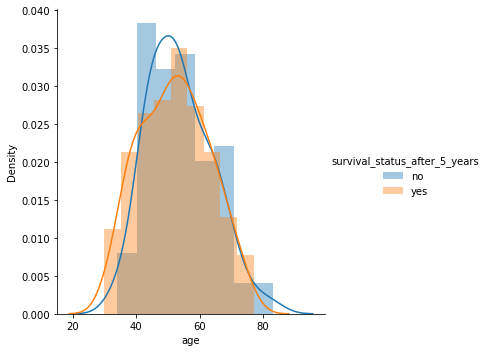

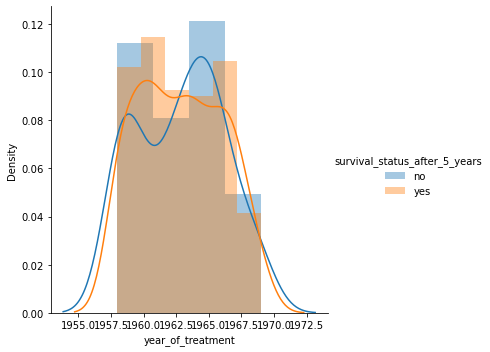

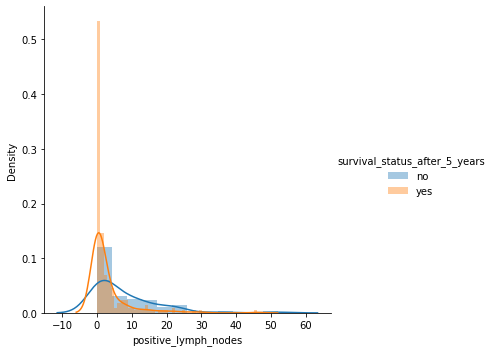

In [16]:
for idx, feature in enumerate(list(df.columns)[:-1]):
    fg = sns.FacetGrid(df, hue='survival_status_after_5_years', size=5)
    fg.map(sns.distplot, feature).add_legend()

<AxesSubplot:ylabel='survival_status_after_5_years'>

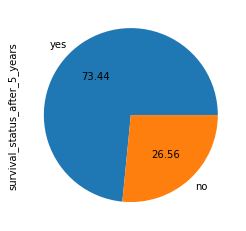

In [17]:
df['survival_status_after_5_years'].value_counts().plot(kind='pie', autopct='%0.2f')

(array([15., 27., 46., 53., 55., 41., 41., 18.,  7.,  2.]),
 array([30. , 35.3, 40.6, 45.9, 51.2, 56.5, 61.8, 67.1, 72.4, 77.7, 83. ]),
 <BarContainer object of 10 artists>)

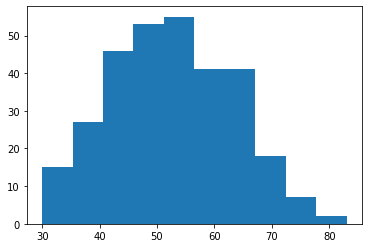

In [18]:
plt.hist(df['age'])

C:\Users\Hunani Trading Co\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

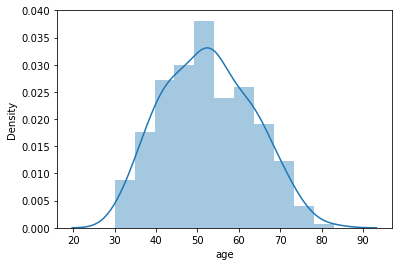

In [19]:
sns.distplot(df['age'])

C:\Users\Hunani Trading Co\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

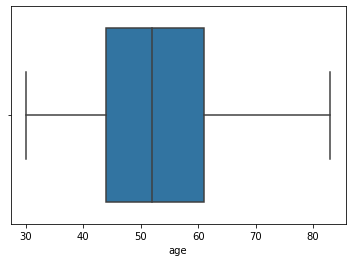

In [20]:
sns.boxplot(df['age'])

In [21]:
df['age'].median()

52.0

In [22]:
df['age'].mean()


52.5311475409836

In [23]:
df['age'].max()

83

In [24]:
print("People of age in between 30 and 45 ",df[(df['age']>30) & (df['age']<45)].shape[0])
print("People of age in between 50 and 65 ",df[(df['age']>50) & (df['age']<65)].shape[0])
print("People of age in between 70 and 85 ",df[(df['age']>70) & (df['age']<85)].shape[0])

People of age in between 30 and 45  77
People of age in between 50 and 65  122
People of age in between 70 and 85  14


# Observation on Univariate Analysis

1. Out of 305 people, 224 (73.4%) people were survived after 5 years.
2. Out of 305 people, 81 (24.5%) people did not survived after 5 years.
3. The survival rate is high. 
4. A lot of people age were in the range of 50 to 55.
    a - People of age in between 30 and 45 were 77
    b - People of age in between 50 and 65 were 122
    c - People of age in between 70 and 85 were 14.
    d - min age was 30 and max age was 83

# MULTIVARIATE ANALYSIS

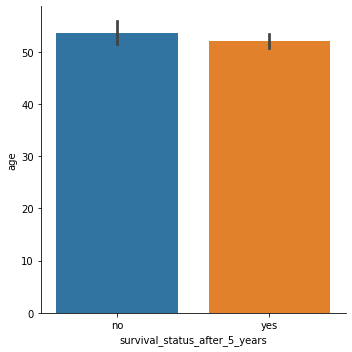

In [39]:
sns.catplot(x='survival_status_after_5_years', y='age',kind = 'bar' , data=df)

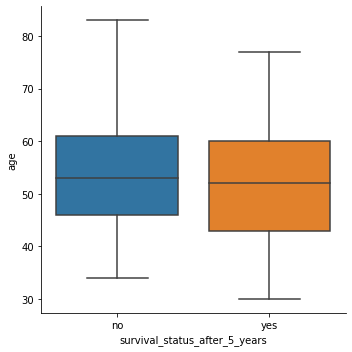

In [25]:
sns.catplot(x='survival_status_after_5_years', y='age',kind = 'box' , data=df)

C:\Users\Hunani Trading Co\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Hunani Trading Co\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

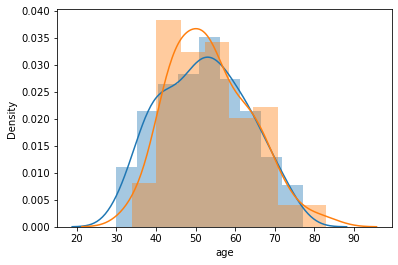

In [26]:
sns.distplot(df[df['survival_status_after_5_years']=='yes']['age'])
sns.distplot(df[df['survival_status_after_5_years']=='no']['age'])

C:\Users\Hunani Trading Co\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


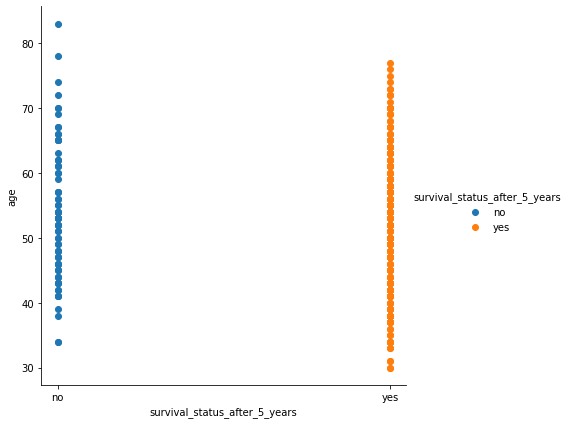

In [27]:
sns.FacetGrid(df, hue="survival_status_after_5_years", size=6).map(plt.scatter, 'survival_status_after_5_years', 'age').add_legend()

C:\Users\Hunani Trading Co\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


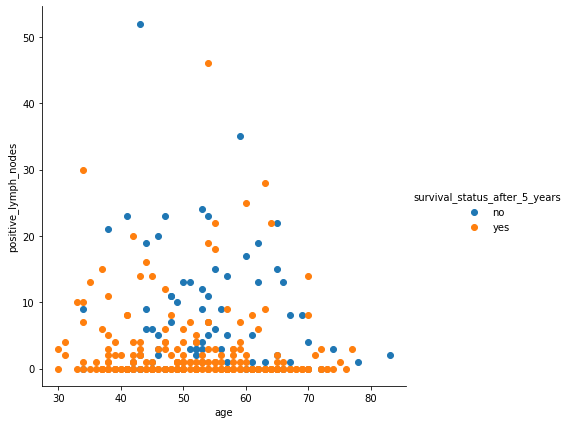

In [28]:
sns.FacetGrid(df, hue="survival_status_after_5_years", size=6).map(plt.scatter, 'age', 'positive_lymph_nodes').add_legend()

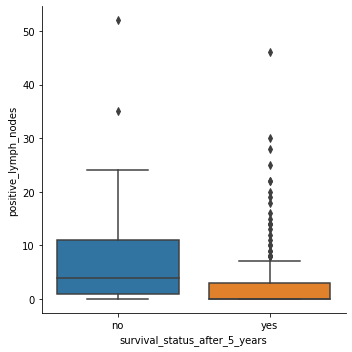

In [29]:
sns.catplot(x='survival_status_after_5_years', y='positive_lymph_nodes', kind='box', data=df)

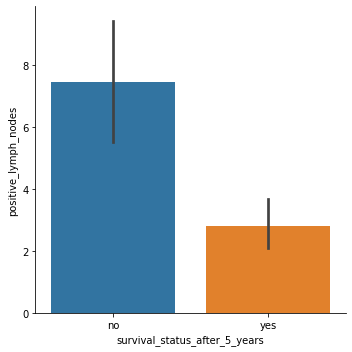

In [30]:
sns.catplot(x='survival_status_after_5_years', y='positive_lymph_nodes', kind='bar', data=df)

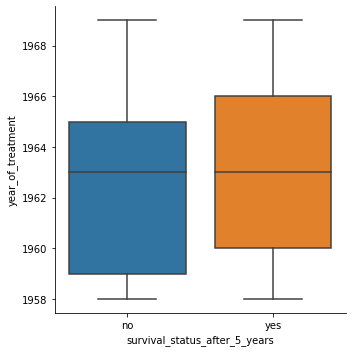

In [31]:
sns.catplot(x='survival_status_after_5_years', y='year_of_treatment', kind='box', data=df)

C:\Users\Hunani Trading Co\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


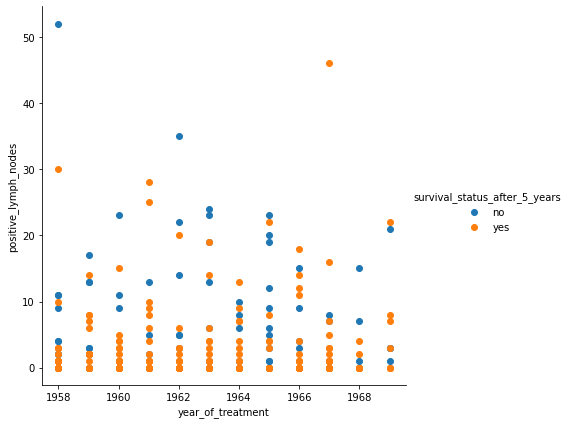

In [32]:
sns.FacetGrid(df, hue="survival_status_after_5_years", size=6).map(plt.scatter, 'year_of_treatment', 'positive_lymph_nodes').add_legend()

C:\Users\Hunani Trading Co\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


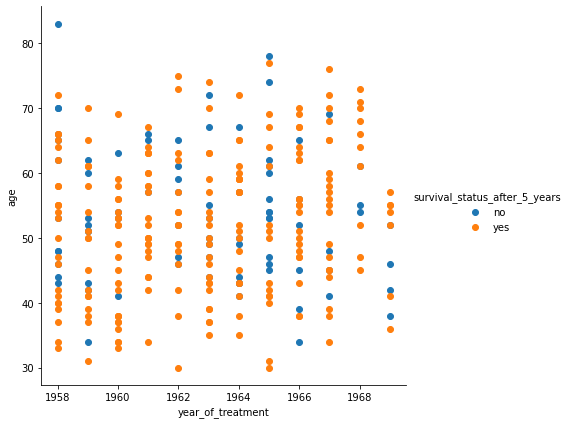

In [33]:
sns.FacetGrid(df, hue="survival_status_after_5_years", size=6).map(plt.scatter, 'year_of_treatment', 'age').add_legend()

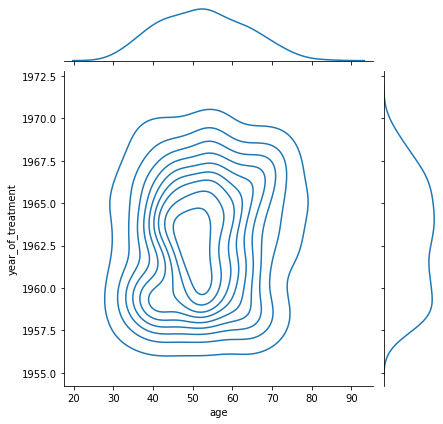

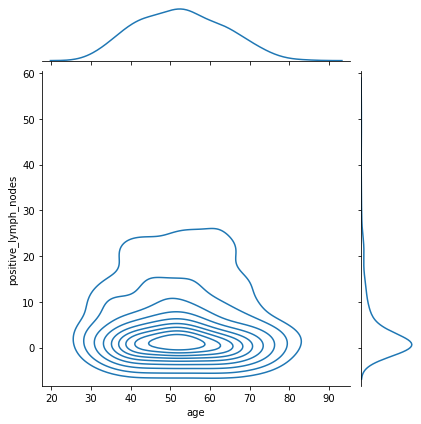

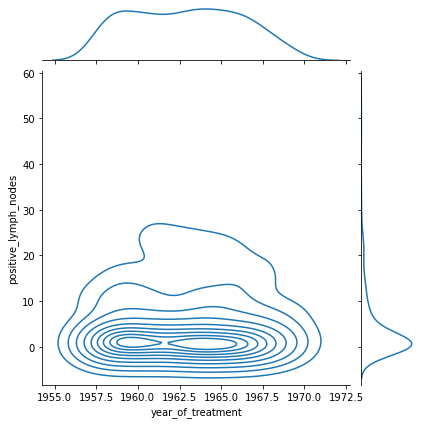

In [34]:
sns.jointplot(x="age",y="year_of_treatment",data=df, kind="kde")
plt.show()

sns.jointplot(x="age",y="positive_lymph_nodes",data=df, kind="kde")
plt.show()

sns.jointplot(x="year_of_treatment",y="positive_lymph_nodes",data=df, kind="kde")
plt.show()

********* age *********
Bin Edges: [30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]
PDF: [0.04918033 0.08852459 0.15081967 0.17377049 0.18032787 0.13442623
 0.13442623 0.05901639 0.02295082 0.00655738]
CDF: [0.04918033 0.13770492 0.28852459 0.46229508 0.64262295 0.77704918
 0.91147541 0.9704918  0.99344262 1.        ]
********* year_of_treatment *********
Bin Edges: [1958.  1959.1 1960.2 1961.3 1962.4 1963.5 1964.6 1965.7 1966.8 1967.9
 1969. ]
PDF: [0.20655738 0.09180328 0.0852459  0.07540984 0.09836066 0.09836066
 0.09180328 0.09180328 0.08196721 0.07868852]
CDF: [0.20655738 0.29836066 0.38360656 0.45901639 0.55737705 0.6557377
 0.74754098 0.83934426 0.92131148 1.        ]
********* positive_lymph_nodes *********
Bin Edges: [ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
PDF: [0.7704918  0.09836066 0.05901639 0.02622951 0.0295082  0.00655738
 0.00327869 0.         0.00327869 0.00327869]
CDF: [0.7704918  0.86885246 0.92786885 0.95409836 0.98360656 0.99016393
 0.993442

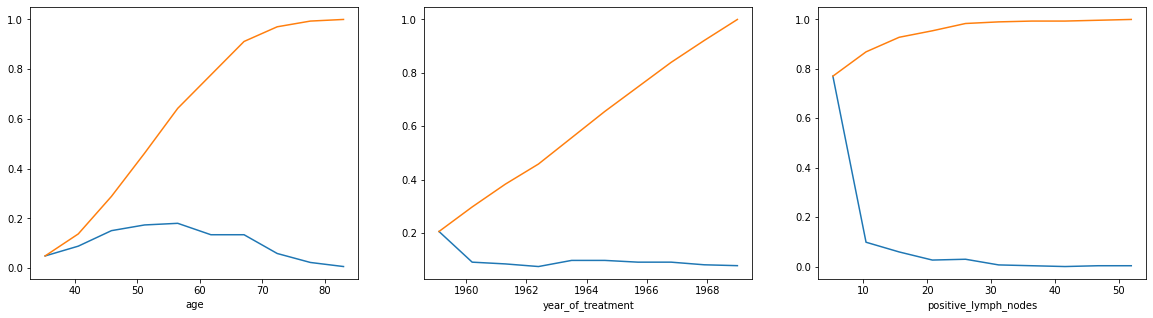

In [35]:
plt.figure(figsize=(20,5))
for idx, feature in enumerate(list(df.columns)[:-1]):
    plt.subplot(1, 3, idx+1)
    print("********* "+feature+" *********")
    counts, bin_edges = np.histogram(df[feature], bins=10, density=True)
    print("Bin Edges: {}".format(bin_edges))
    pdf = counts/sum(counts)
    print("PDF: {}".format(pdf))
    cdf = np.cumsum(pdf)
    print("CDF: {}".format(cdf))
    plt.plot(bin_edges[1:], pdf, bin_edges[1:], cdf)
    plt.xlabel(feature)


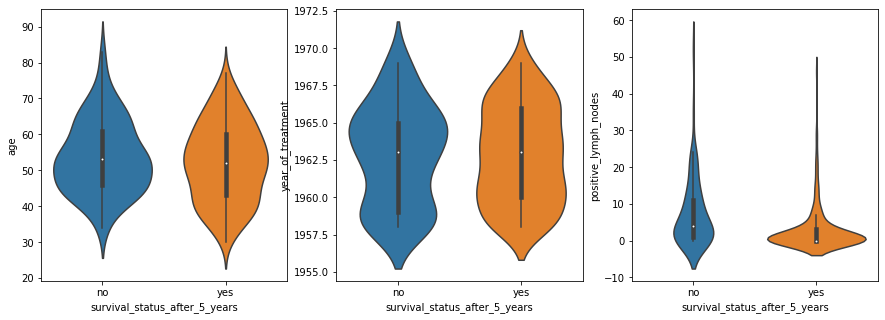

In [36]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, feature in enumerate(list(df.columns)[:-1]):
    sns.violinplot( x='survival_status_after_5_years', y=feature, data=df, ax=axes[idx])
plt.show()

C:\Users\Hunani Trading Co\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


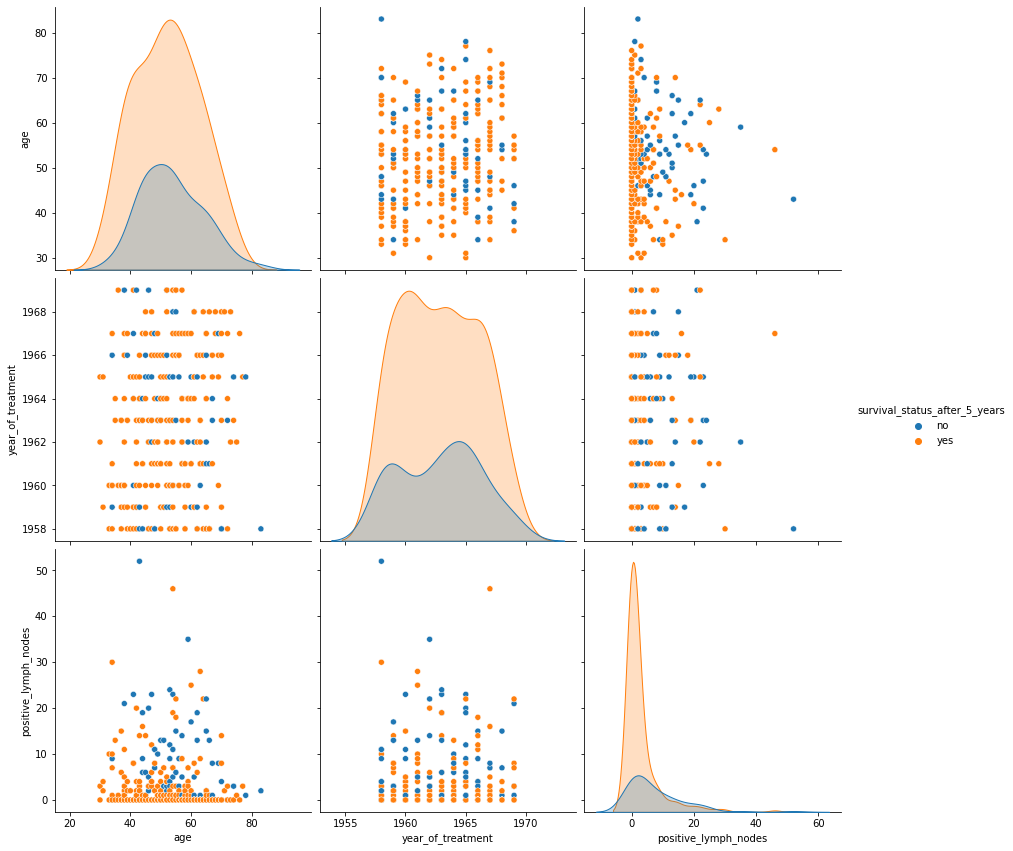

In [37]:
sns.pairplot(df, hue='survival_status_after_5_years', size=4)

# OBSERVATION ON MULTIVARIATE ANALYSIS

In [ ]:
1. People at age 40 to 60 survived the most.
2. People with 0 to 10 positive_lymph_nodes has a higher survival rate.
3. People with more than 10 positive_lymph_nodes has lower survival rate.
4. year_of_treatment 1958 to 1961,  has a higher survival rate.
5. year_of_treatment 1965 has the lowest survival rate.
6. Patients with age > 77 were not able to survive.
7. Higher the positive_lymph_nodes, Higher the chances of patients death.